In [2]:
%matplotlib inline
from fastai.basics import *

In this part of the lecture we explain Stochastic Gradient Descent (SGD) which is an **optimization** method commonly used in neural networks. We will illustrate the concepts with concrete examples.

#  Linear Regression problem

The goal of linear regression is to fit a line to a set of points.

In [25]:
n=100

In [26]:
x = torch.ones(n,2) 
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[ 0.7685,  1.0000],
        [-0.0080,  1.0000],
        [ 0.8924,  1.0000],
        [-0.5312,  1.0000],
        [ 0.4898,  1.0000]])

In [27]:
# Coefficients: the slope and the intercept
a = tensor([3.,2]); a.size()

# # Fun fact, these are NOT the same:
# d = tensor([1, 2]) # Size([2])
# e = tensor([[1, 2]]) # Size([1, 2])

torch.Size([2])

In [28]:
# x@a is equivalent to torch.matmul(x, a) because it automagically runs matrix-vector product
# From pytorch docs:
# If the first argument is 2-dimensional 
# and the second argument is 1-dimensional, the matrix-vector product is returned.
# torch.mm(x, a) will NOT work, because it expects matrix multiplication
# My knowledge of all of this is VERY shaky

# size() returns ROW x COL
# so the INNER numbers must match, and the outer numbers are the new dimensions
# y is a 1D tensor with length 100
y = x@a + torch.rand(n)
y[0:5]

tensor([4.4925, 2.6490, 5.5885, 0.5267, 3.4997])

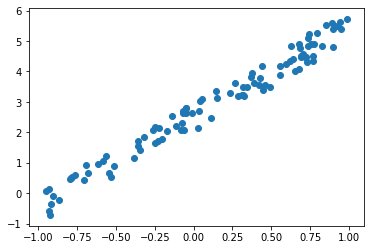

In [29]:
# What we've done so far is created a bunch of random values for plotting along the x-axis
# x[:,0] selects all the values from index 0
# y is calculated by doing matrix multiplication between x and a with some random num added
plt.scatter(x[:,0], y);

You want to find **parameters** (weights) `a` such that you minimize the *error* between the points and the line `x@a`. Note that here `a` is unknown. For a regression problem the most common *error function* or *loss function* is the **mean squared error**. 

In [29]:
# both inputs are tensors/matrices
# matrix subtraction is normal
# the square is applied element-wise
# We then take the average of all the elements
def mse(y_hat, y):
    return ((y_hat - y)**2).mean()

Suppose we believe `a = (-1.0,1.0)` then we can compute `y_hat` which is our *prediction* and then compute our error.

In [37]:
a = tensor(-1.,1)

In [38]:
y_hat = x@a
mse(y_hat, y)

tensor(9.3705)

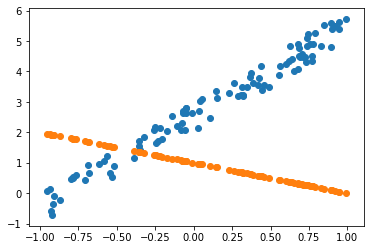

In [39]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

So far we have specified the *model* (linear regression) and the *evaluation criteria* (or *loss function*). Now we need to handle *optimization*; that is, how do we find the best values for `a`? How do we find the best *fitting* linear regression.

# Gradient Descent

We would like to find the values of `a` that minimize `mse_loss`.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in [PyTorch](http://pytorch.org/).

In [40]:
# Parameter takes tensor as an argument, and has requires_grad=True by default
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [41]:
def update():
    # matrix multiplication is like.. plotting the predicted line
    # by getting all the y's from x's + the random weight, a
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward() # calculates loss derivative and stores it in the Parameter, a.grad()
    with torch.no_grad(): # context-manager that disables gradient calculation so we can manually do it
        a.sub_(lr * a.grad)
        a.grad.zero_() # sets it back to zero before the next loop

In [42]:
lr = 1e-1
for t in range(100): update()

tensor(9.3705, grad_fn=<MeanBackward0>)
tensor(1.2206, grad_fn=<MeanBackward0>)
tensor(0.3708, grad_fn=<MeanBackward0>)
tensor(0.1575, grad_fn=<MeanBackward0>)
tensor(0.1007, grad_fn=<MeanBackward0>)
tensor(0.0855, grad_fn=<MeanBackward0>)
tensor(0.0815, grad_fn=<MeanBackward0>)
tensor(0.0804, grad_fn=<MeanBackward0>)
tensor(0.0801, grad_fn=<MeanBackward0>)
tensor(0.0800, grad_fn=<MeanBackward0>)


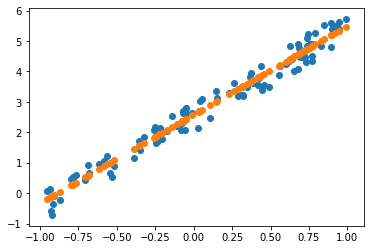

In [43]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a);

## Animate it!

In [44]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [47]:
a = nn.Parameter(tensor(-3.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a)
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

In practice, we don't calculate on the whole file at once, but we use *mini-batches*.

## Vocab

- Learning rate: We multiply the gradient by our learning rate in order to update the weights. How "large" of a step we'll take in the direction of steepest descent.
- Epoch: Once we've seen every input in our training set once, we've completed one epoch. For SGD we run through the inputs in mini-batches, and after X many batches we'll have seen every input at least once.
- Minibatch: If our training set is HUGE, we won't be able to calculate the losses in one go, so we can break up the training set in batches.
- SGD: Stochastic descent using mini-batches
- Model / Architecture: The mathematical function that we're fitting the model to. In this notebook, that function was y = ax + b
- Parameters: Numbers that we're updating
- Loss function: How far away we are from the correct answer

For classification problems, we use *cross entropy loss*, also known as *negative log likelihood loss*. This penalizes incorrect confident predictions, and correct unconfident predictions.